In [ ]:
import numpy as np
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving last - Copy of ww (5).csv to last - Copy of ww (5).csv


In [ ]:
df = pd.read_csv('last - Copy of ww (5).csv')
df.head(10)

,translateded,processed_text,Behavioural_Intention,Trust,Awareness,Health_Awareness,Technostress,Self_Efficacy,Prive_value,Perceived_enjoyment,Habit
0,yes ever used a healthy application some use f...,iya pernah guna aplikasi sehat beberapa pakai ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,continue to get pregnant to tell to better kno...,terus hamil hamil suruh biar lebih tahu detail...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,pregnancy does use a lot of some of my primary...,hamil memang banyak pakai beberapa anak primak...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pregnant paka bumil flow friend flow for ordin...,hamil paka teman bumil flow sekali buat menstr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,difficult different applications like differen...,sulit paling beda aplikasi tidak yakin suka be...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
5,for example don t use the point of using the ...,misal tidak pakai titik pakai titik paling ada...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,what is the name of the high flower weight gra...,apa nama kembang tinggi berat grafik tumbuh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,continue to make a vaccine reminding the vacci...,terus buat vaksin ngingetin vaksin lupa suka lupa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8,what vaccine is next month what help we remem...,vaksin apa bulan depan apa nah lebih bantu ara...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,long use of my primary not to pay children,lama pakai primaku tidak bayar anak,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
# Menghapus kolom-kolom kecuali 'processed_text'
df = df[['processed_text',
 'Behavioural_Intention',
 'Trust',
 'Awareness',
 'Health_Awareness',
 'Technostress',
 'Self_Efficacy',
 'Prive_value',
 'Perceived_enjoyment',
 'Habit']]


In [ ]:
# Memilih kolom kecuali kolom 'Content'
column_list = [col for col in df.columns if col != 'processed_text']

# Mengubah nilai yang tidak bisa dikonversi menjadi NaN
df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

# Mengganti nilai NaN dengan 0
df[column_list] = df[column_list].fillna(0)

# Mengubah tipe data kolom dalam column_list menjadi int64
df[column_list] = df[column_list].astype('int64')

column_list


['Behavioural_Intention',
 'Trust',
 'Awareness',
 'Health_Awareness',
 'Technostress',
 'Self_Efficacy',
 'Prive_value',
 'Perceived_enjoyment',
 'Habit']

In [ ]:
df.dtypes

,0
processed_text,object
Behavioural_Intention,int64
Trust,int64
Awareness,int64
Health_Awareness,int64
Technostress,int64
Self_Efficacy,int64
Prive_value,int64
Perceived_enjoyment,int64
Habit,int64


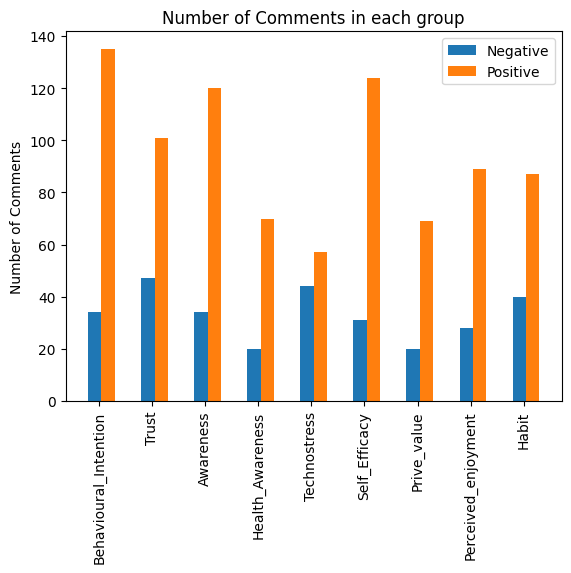

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
factors = ['Behavioural_Intention', 'Trust', 'Awareness',
           'Health_Awareness', 'Technostress',
           'Self_Efficacy', 'Prive_value', 'Perceived_enjoyment',
           'Habit']

# Menghitung nilai negatif dan positif
positif = [(df[factor] == 1).sum() for factor in factors]
negatif = [(df[factor] == 2).sum() for factor in factors]

# Menentukan posisi pada sumbu x
x_axis = np.arange(len(factors))
width = 0.25

# Membuat plot
plt.bar(x_axis, negatif, width, label='Negative')
plt.bar(x_axis + width, positif, width, label='Positive')

# Menyesuaikan label pada sumbu x
plt.xticks(x_axis + width / 3, factors, rotation=90)

# Menambah label dan judul
plt.ylabel("Number of Comments")
plt.title("Number of Comments in each group")
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
# Mengambil kolom yang sesuai untuk label
# Mengambil kolom teks yang telah diproses
texts = df['processed_text'].tolist()
label_columns = [col for col in df.columns if col not in ['processed_text']]
labels = df[label_columns].values

In [ ]:
# Filter data untuk menghapus sampel dengan label 0
mask = np.any(labels == 1, axis=1) | np.any(labels == 2, axis=1)
filtered_labels = labels[mask]
filtered_texts = [texts[i] for i in range(len(texts)) if mask[i]]

In [ ]:
len(df[mask])

727

In [ ]:
# Verifikasi hasil
print("Number of original samples:", len(texts))
print("Number of filtered samples:", len(filtered_texts))
print("Shape of original labels:", labels.shape)
print("Shape of filtered labels:", filtered_labels.shape)

Number of original samples: 1440
Number of filtered samples: 727
Shape of original labels: (1440, 9)
Shape of filtered labels: (727, 9)


In [ ]:
# Mengonversi teks dan label yang difilter kembali ke DataFrame
df_filtered = pd.DataFrame({'processed_text': filtered_texts})
for idx, col in enumerate(label_columns):
    df_filtered[col] = filtered_labels[:, idx]

In [ ]:
df_onehot1 = pd.get_dummies(df_filtered, columns=label_columns)
df_onehot1.head()

,processed_text,Behavioural_Intention_0,Behavioural_Intention_1,Behavioural_Intention_2,Trust_0,Trust_1,Trust_2,Awareness_0,Awareness_1,Awareness_2,...,Self_Efficacy_2,Prive_value_0,Prive_value_1,Prive_value_2,Perceived_enjoyment_0,Perceived_enjoyment_1,Perceived_enjoyment_2,Habit_0,Habit_1,Habit_2
0,terus hamil hamil suruh biar lebih tahu detail...,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,sulit paling beda aplikasi tidak yakin suka be...,True,False,False,True,False,False,True,False,False,...,True,True,False,False,True,False,False,True,False,False
2,terus buat vaksin ngingetin vaksin lupa suka lupa,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
3,lama pakai primaku tidak bayar anak,True,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
4,terus teman bumil tidak bayar beberapa fitur b...,True,False,False,True,False,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False


In [ ]:
# Hapus faktor yang berakhiran _0
columns_to_drop = [col for col in df_onehot1.columns if col.endswith('_0')]
df_onehot2 = df_onehot1.drop(columns=columns_to_drop)

In [ ]:
# Siapkan data teks dan label
texts = df_onehot2['processed_text'].tolist()
label_columns_onehot = [col for col in df_onehot2.columns if col not in ['processed_text']]
labels = df_onehot2[label_columns_onehot].values

In [ ]:
# Preprocessing data
vocab_size = 5000
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_length = 100
padded_sequences = pad_sequences(sequences, truncating='pre', padding='pre', maxlen=max_length)

In [ ]:
#labels_for_stratify = labels.argmax(axis=1)
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
# Periksa bentuk data setelah split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (581, 100)
Shape of y_train: (581, 18)
Shape of X_val: (146, 100)
Shape of y_val: (146, 18)


In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # First BiLSTM layer
model.add(Bidirectional(LSTM(64)))  # Second BiLSTM layer
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_20 (Bidirectional)     │ (None, 100, 256)            │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_21 (Bidirectional)     │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 18)                  │           4,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635,810 (2.43 MB)

 Trainable params: 635,554 (2.42 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8, callbacks=[reduce_lr])

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 0.0743 - loss: 1.7402 - val_accuracy: 0.0479 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.1052 - loss: 0.6364 - val_accuracy: 0.1027 - val_loss: 0.4472 - learning_rate: 0.0010
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 25s 350ms/step - accuracy: 0.1295 - loss: 0.3979 - val_accuracy: 0.1027 - val_loss: 0.3456 - learning_rate: 0.0010
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 334ms/step - accuracy: 0.1276 - loss: 0.3251 - val_accuracy: 0.1507 - val_loss: 0.3111 - learning_rate: 0.0010
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.1278 - loss: 0.3032 - val_accuracy: 0.1918 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - accuracy: 0.1830 - loss: 0.2762 - val_accuracy: 0.2671 - val_loss: 0.2576 - learning_rate: 0.0010
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - accuracy: 0.2485 - loss: 0.

In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model16 = Sequential()
model16.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model16.add(Bidirectional(LSTM(128, return_sequences=True)))  # First BiLSTM layer
model16.add(Bidirectional(LSTM(64)))  # Second BiLSTM layer
model16.add(Dropout(0.3))
model16.add(BatchNormalization())

model16.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model16.add(Dropout(0.3))
model16.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model16.build(input_shape=(None, max_length))

# Compile the model
model16.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model16.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ (None, 100, 256)            │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_19 (Bidirectional)     │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 18)                  │           4,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635,810 (2.43 MB)

 Trainable params: 635,554 (2.42 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history16 = model16.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=16, callbacks=[reduce_lr])

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - accuracy: 0.0299 - loss: 1.9793 - val_accuracy: 0.1164 - val_loss: 1.1998 - learning_rate: 0.0010
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - accuracy: 0.0910 - loss: 0.9644 - val_accuracy: 0.1096 - val_loss: 0.7503 - learning_rate: 0.0010
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - accuracy: 0.1434 - loss: 0.5932 - val_accuracy: 0.1233 - val_loss: 0.5038 - learning_rate: 0.0010
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.1314 - loss: 0.4284 - val_accuracy: 0.1233 - val_loss: 0.4021 - learning_rate: 0.0010
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.1471 - loss: 0.3462 - val_accuracy: 0.1164 - val_loss: 0.3836 - learning_rate: 0.0010
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.1405 - loss: 0.3203 - val_accuracy: 0.1507 - val_loss: 0.3219 - learning_rate: 0.0010
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - accuracy: 0.2216 - loss: 0.

In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model32 = Sequential()
model32.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model32.add(Bidirectional(LSTM(128, return_sequences=True)))  # First BiLSTM layer
model32.add(Bidirectional(LSTM(64)))  # Second BiLSTM layer
model32.add(Dropout(0.3))
model32.add(BatchNormalization())

model32.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model32.add(Dropout(0.3))
model32.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model32.build(input_shape=(None, max_length))

# Compile the model
model32.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model32.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_22 (Bidirectional)     │ (None, 100, 256)            │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_23 (Bidirectional)     │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 18)                  │           4,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635,810 (2.43 MB)

 Trainable params: 635,554 (2.42 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history32 = model32.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32, callbacks=[reduce_lr])

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 606ms/step - accuracy: 0.0894 - loss: 2.1999 - val_accuracy: 0.1781 - val_loss: 1.6394 - learning_rate: 0.0010
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 593ms/step - accuracy: 0.0876 - loss: 1.3602 - val_accuracy: 0.1164 - val_loss: 1.1267 - learning_rate: 0.0010
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 466ms/step - accuracy: 0.0629 - loss: 0.9506 - val_accuracy: 0.1233 - val_loss: 0.8451 - learning_rate: 0.0010
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 498ms/step - accuracy: 0.0885 - loss: 0.7013 - val_accuracy: 0.1575 - val_loss: 0.6552 - learning_rate: 0.0010
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.1426 - loss: 0.5424 - val_accuracy: 0.1849 - val_loss: 0.5194 - learning_rate: 0.0010
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 501ms/step - accuracy: 0.1048 - loss: 0.4492 - val_accuracy: 0.1370 - val_loss: 0.4562 - learning_rate: 0.0010
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 519ms/step - accuracy: 0.1484 - loss: 0.3

In [ ]:
# Evaluasi pada data testing
loss, accuracy = model.evaluate(X_val, y_val)
loss16, accuracy16 = model16.evaluate(X_val, y_val)
loss32, accuracy32 = model32.evaluate(X_val, y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6529 - loss: 0.1625
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6865 - loss: 0.1486
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5268 - loss: 0.2087


In [ ]:
# Evaluasi pada data testing
loss, accuracy = model16.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.7604 - loss: 0.0991


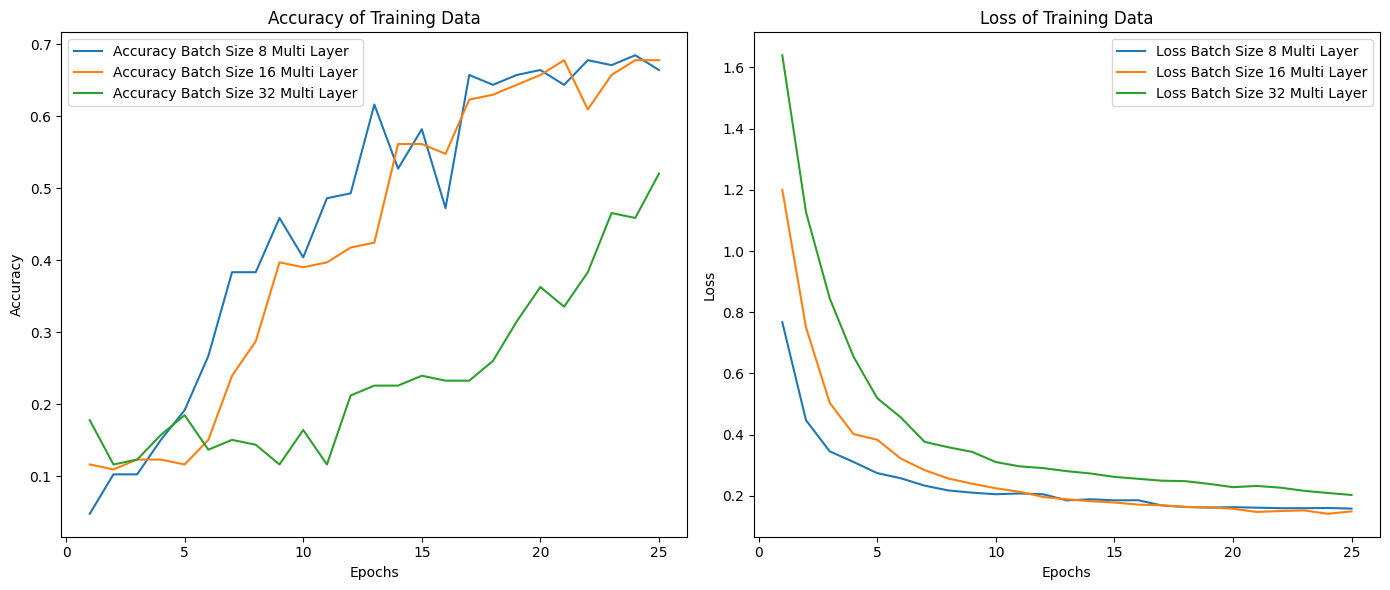

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss for each split
accuracy_70_30 = history.history['val_accuracy']
loss_70_30 = history.history['val_loss']

accuracy_80_20 = history16.history['val_accuracy']
loss_80_20 = history16.history['val_loss']

accuracy_90_10 = history32.history['val_accuracy']
loss_90_10 = history32.history['val_loss']

epochs_70_30 = range(1, len(accuracy_70_30) + 1)
epochs_80_20 = range(1, len(accuracy_80_20) + 1)
epochs_90_10 = range(1, len(accuracy_90_10) + 1)

# Plotting the results
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_70_30, accuracy_70_30, label='Accuracy Batch Size 8 Multi Layer')
plt.plot(epochs_80_20, accuracy_80_20, label='Accuracy Batch Size 16 Multi Layer')
plt.plot(epochs_90_10, accuracy_90_10, label='Accuracy Batch Size 32 Multi Layer')
plt.title('Accuracy of Training Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_70_30, loss_70_30, label='Loss Batch Size 8 Multi Layer')
plt.plot(epochs_80_20, loss_80_20, label='Loss Batch Size 16 Multi Layer')
plt.plot(epochs_90_10, loss_90_10, label='Loss Batch Size 32 Multi Layer')
plt.title('Loss of Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step


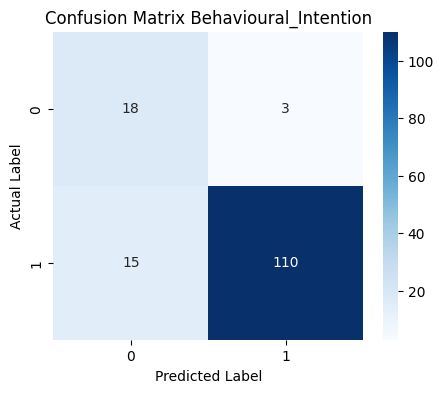

Accuracy: 0.8767123287671232
Precision: 0.8571428571428571
Recall: 0.5454545454545454
F1-score: 0.6666666666666665


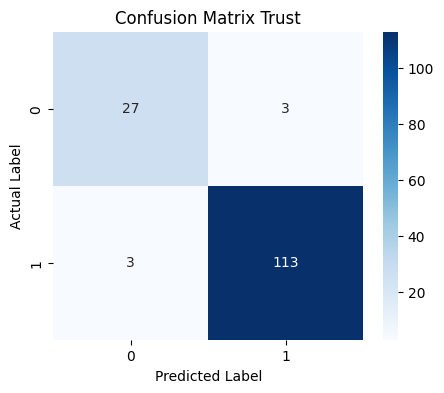

Accuracy: 0.958904109589041
Precision: 0.9
Recall: 0.9
F1-score: 0.9


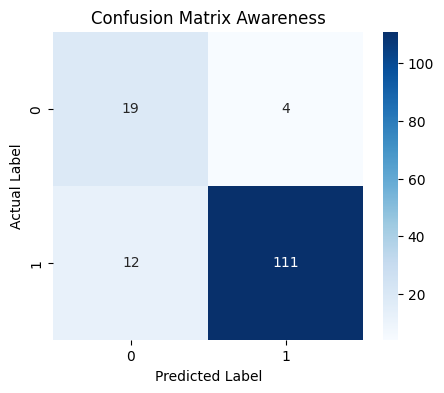

Accuracy: 0.8904109589041096
Precision: 0.8260869565217391
Recall: 0.6129032258064516
F1-score: 0.7037037037037037


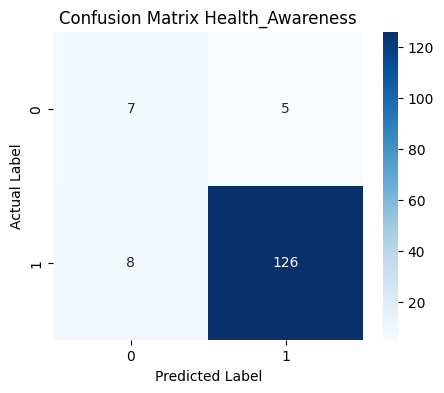

Accuracy: 0.910958904109589
Precision: 0.5833333333333334
Recall: 0.4666666666666667
F1-score: 0.5185185185185186


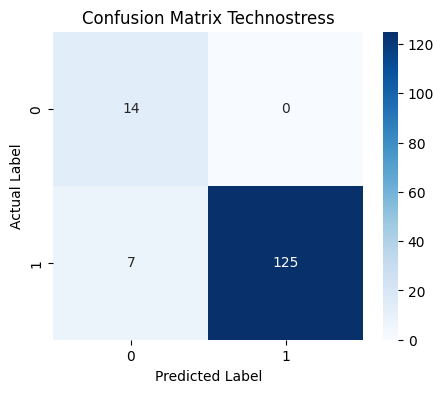

Accuracy: 0.952054794520548
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8


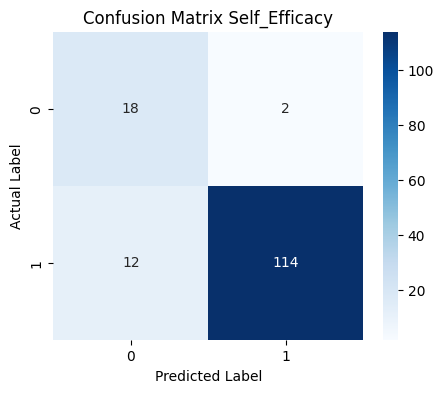

Accuracy: 0.9041095890410958
Precision: 0.9
Recall: 0.6
F1-score: 0.7200000000000001


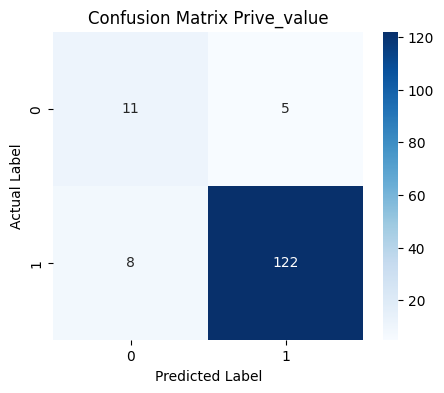

Accuracy: 0.910958904109589
Precision: 0.6875
Recall: 0.5789473684210527
F1-score: 0.6285714285714286


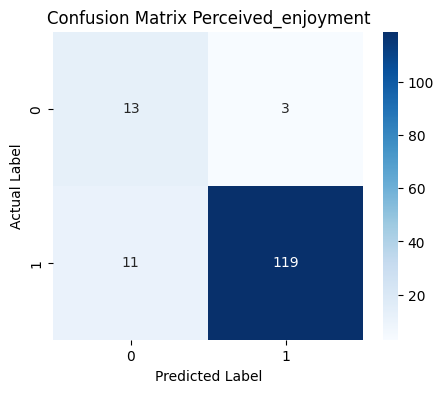

Accuracy: 0.9041095890410958
Precision: 0.8125
Recall: 0.5416666666666666
F1-score: 0.65


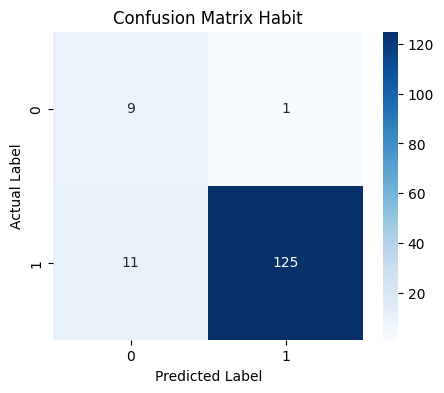

Accuracy: 0.9178082191780822
Precision: 0.9
Recall: 0.45
F1-score: 0.6


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan model sudah dilatih dan aspect_columns sudah didefinisikan
y_pred1 = model16.predict(X_val)

for i, label_sm in enumerate(label_columns):
    # Ambil dua kolom yang sesuai dari y_pred untuk tiap aspek
    pred_aspek = y_pred1[:, i*2:i*2+2]

    # Ambil argmax dari prediksi untuk menentukan label dengan probabilitas tertinggi
    y_pred_aspect = np.argmax(pred_aspek, axis=1)

    # Ambil nilai dari y_pred sesuai dengan indeks argmax
    pred_values = pred_aspek[np.arange(pred_aspek.shape[0]), y_pred_aspect]

    # Terapkan kondisi >= 0.5
    y_pred_binary = pred_values >= 0.5

    # Ambil label asli dari y_test untuk tiap aspek
    y_aspect = y_val[:,  i*2:i*2+2]

    y_true_aspect = np.argmax(y_aspect, axis=1)

    y_true_values = y_aspect[np.arange(y_aspect.shape[0]), y_true_aspect]

    # Menghitung confusion matrix untuk tiap aspek
    cm = confusion_matrix(y_true_values, y_pred_binary)

    # Urutkan ulang elemen confusion matrix sesuai dengan permintaan
    cm_corrected = np.array([
        [cm[1, 1], cm[0, 1]],
        [cm[1, 0], cm[0, 0]]
    ])

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_corrected, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix {label_sm}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_true_values, y_pred_binary)
    precision = precision_score(y_true_values, y_pred_binary)
    recall = recall_score(y_true_values, y_pred_binary)
    f1 = f1_score(y_true_values, y_pred_binary)

    # Print metrik evaluasi
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
